# احتمال اور شماریات کا تعارف  
اس نوٹ بک میں، ہم ان تصورات کے ساتھ تجربہ کریں گے جن پر ہم پہلے بات کر چکے ہیں۔ احتمال اور شماریات کے کئی تصورات ڈیٹا پروسیسنگ کے لیے پائتھون کی بڑی لائبریریوں، جیسے کہ `numpy` اور `pandas` میں بخوبی پیش کیے گئے ہیں۔  


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## تصادفی متغیرات اور تقسیمات  
آئیے 0 سے 9 تک کی یکساں تقسیم سے 30 قدروں کا نمونہ نکالنے سے شروع کرتے ہیں۔ ہم اوسط اور واریانس بھی حساب کریں گے۔  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


نمونے میں کتنی مختلف قدریں ہیں اس کا بصری اندازہ لگانے کے لیے، ہم **ہسٹوگرام** بنا سکتے ہیں:


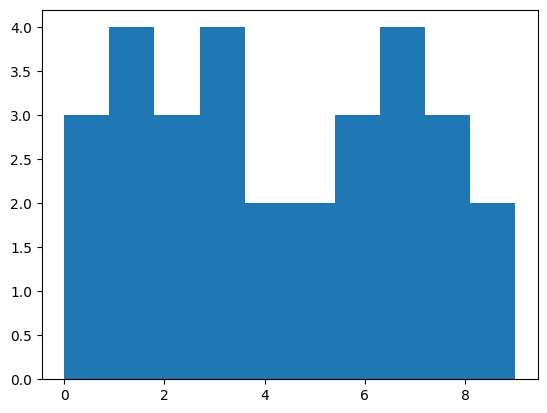

In [119]:
plt.hist(sample)
plt.show()

## حقیقی ڈیٹا کا تجزیہ

حقیقی دنیا کے ڈیٹا کا تجزیہ کرتے وقت اوسط اور تغیر بہت اہم ہوتے ہیں۔ آئیے بیس بال کھلاڑیوں کے بارے میں ڈیٹا لوڈ کرتے ہیں [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) سے۔


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


ہم یہاں ڈیٹا کے تجزیے کے لیے [**Pandas**](https://pandas.pydata.org/) نامی پیکیج استعمال کر رہے ہیں۔ اس کورس میں آگے چل کر ہم Pandas اور Python میں ڈیٹا کے ساتھ کام کرنے کے بارے میں مزید بات کریں گے۔

آئیے عمر، قد اور وزن کے اوسط نکالیں:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

اب آئیے قد پر توجہ مرکوز کرتے ہیں، اور معیاری انحراف اور واریئنس کا حساب لگاتے ہیں:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


میڈین کی قیمت اور چوتھائی حصوں کو دیکھنا بھی معنی خیز ہے۔ انہیں ایک **باکس پلاٹ** کے ذریعے تصور کیا جا سکتا ہے:


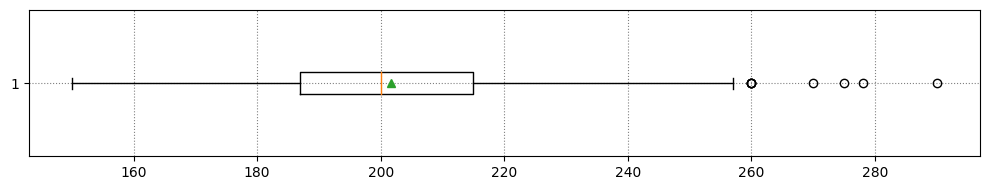

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

ہم اپنے ڈیٹاسیٹ کے ذیلی حصوں کے باکس پلاٹس بھی بنا سکتے ہیں، مثال کے طور پر، کھلاڑی کے کردار کے مطابق گروپ بندی کر کے۔


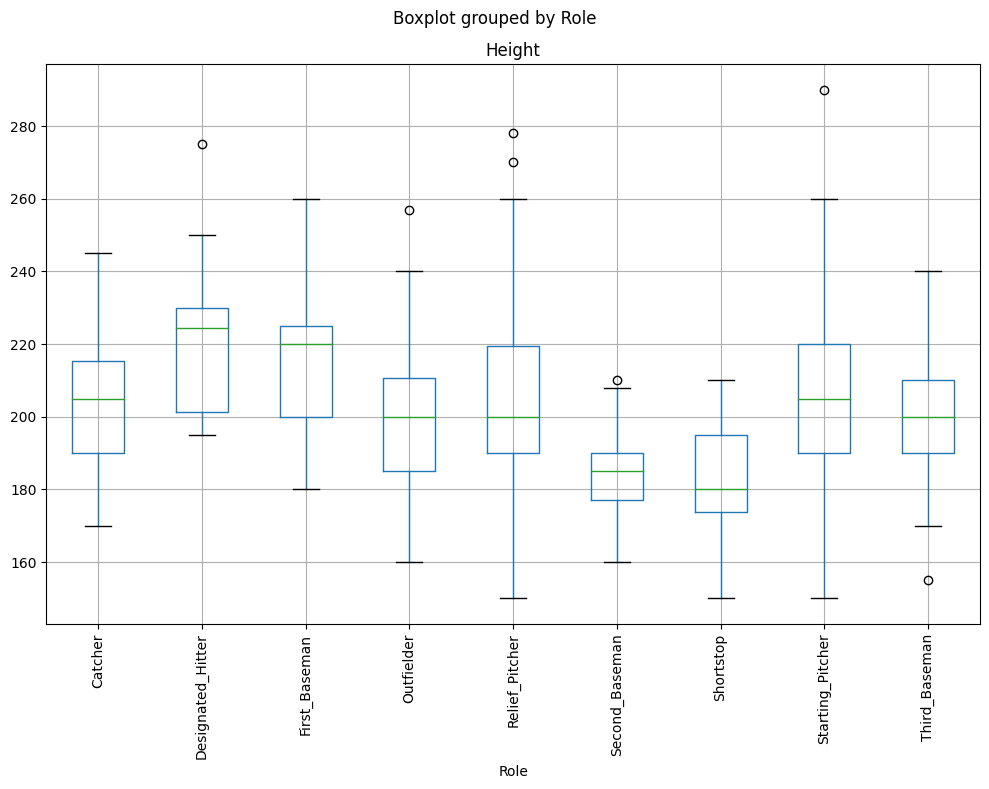

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **نوٹ**: یہ خاکہ ظاہر کرتا ہے کہ اوسطاً، پہلے بیس مین کی لمبائی دوسرے بیس مین کی لمبائی سے زیادہ ہوتی ہے۔ بعد میں ہم سیکھیں گے کہ اس مفروضے کو مزید رسمی طور پر کیسے جانچا جا سکتا ہے، اور یہ ظاہر کرنے کے لیے کہ ہمارے ڈیٹا کا شماریاتی طور پر اہم ہونا کیسے ثابت کیا جا سکتا ہے۔

عمر، قد اور وزن سب مسلسل بے ترتیب متغیرات ہیں۔ آپ کے خیال میں ان کی تقسیم کیسی ہوگی؟ اس کا پتہ لگانے کا ایک اچھا طریقہ یہ ہے کہ ان اقدار کا ہسٹوگرام بنایا جائے:


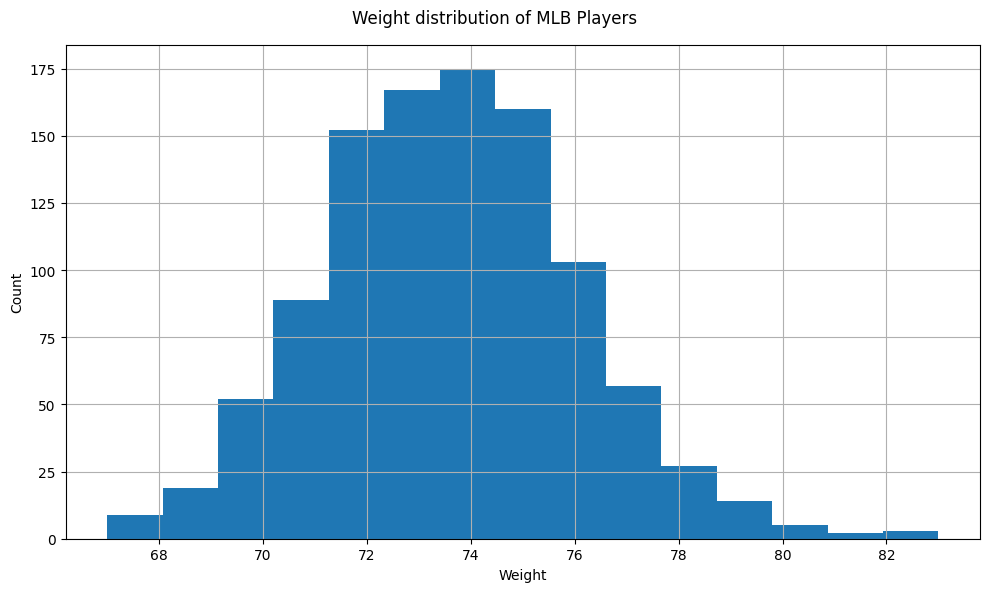

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## نارمل ڈسٹریبیوشن

آئیے وزن کے ایک مصنوعی نمونے کو تخلیق کرتے ہیں جو ہمارے اصل ڈیٹا کے اوسط اور ویرینس کے مطابق نارمل ڈسٹریبیوشن کی پیروی کرتا ہو:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

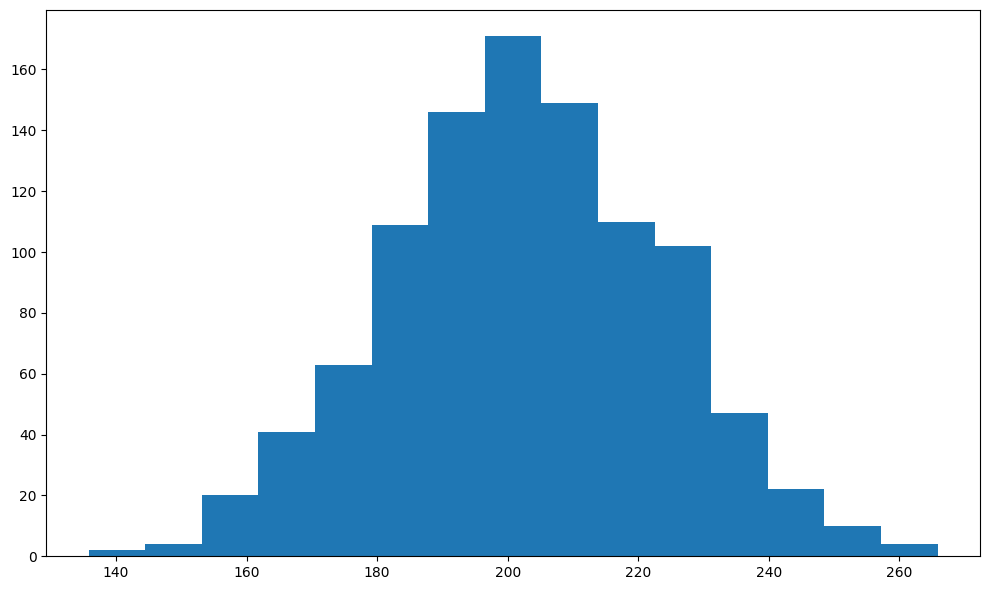

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

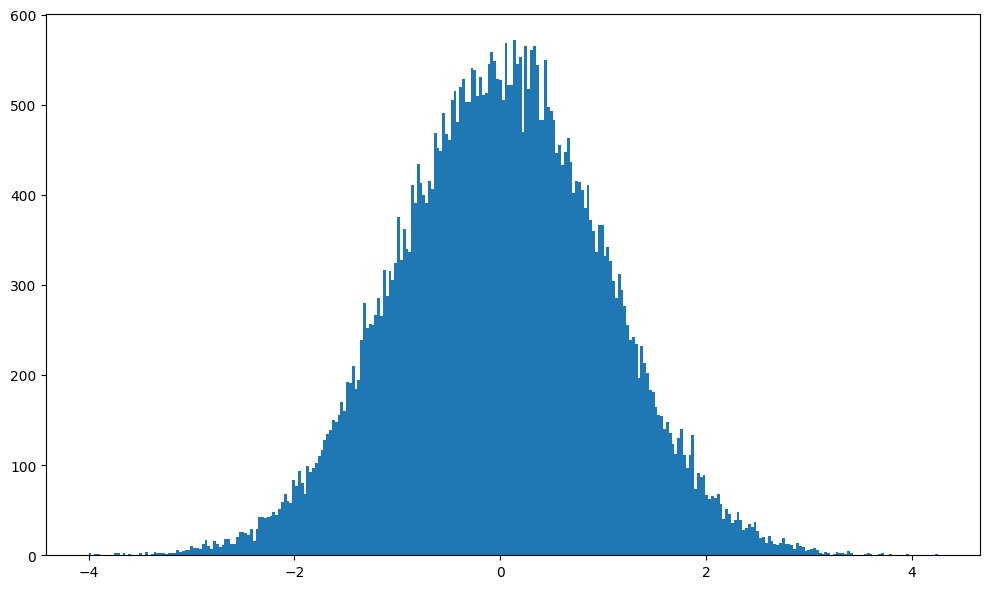

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

چونکہ حقیقی زندگی میں زیادہ تر اقدار عام تقسیم شدہ ہوتی ہیں، ہمیں نمونہ ڈیٹا پیدا کرنے کے لیے یکساں بے ترتیب نمبر جنریٹر استعمال نہیں کرنا چاہیے۔ یہاں یہ ہوتا ہے اگر ہم یکساں تقسیم کے ساتھ وزن پیدا کرنے کی کوشش کریں (جو `np.random.rand` کے ذریعے پیدا کیا گیا ہے):


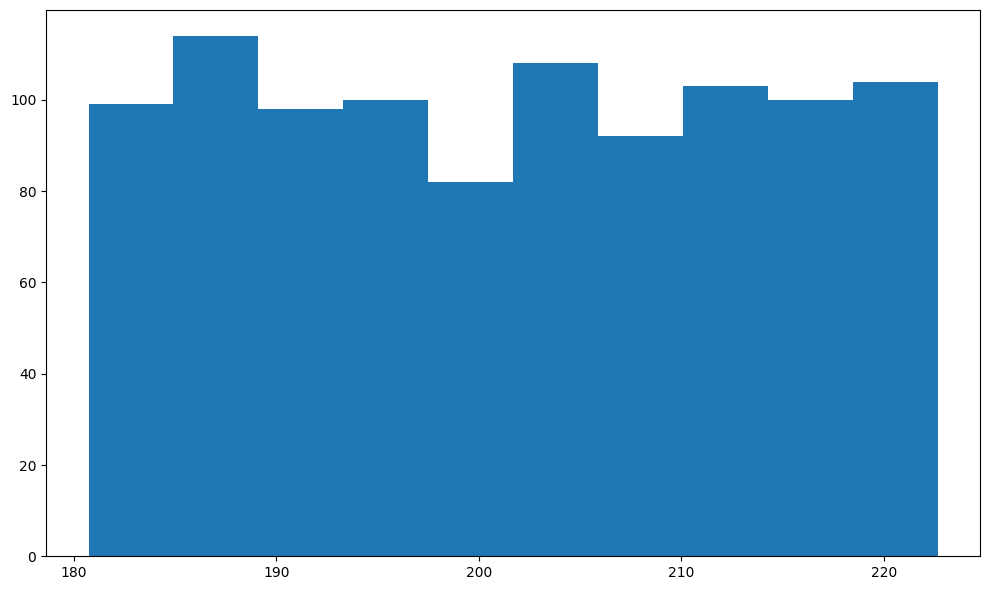

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## اعتماد کے وقفے

آئیے اب بیس بال کھلاڑیوں کے وزن اور قد کے لیے اعتماد کے وقفے کا حساب لگاتے ہیں۔ ہم اس کوڈ کا استعمال کریں گے [اس اسٹیک اوور فلو بحث سے](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## مفروضہ کی جانچ

آئیے اپنے بیس بال کھلاڑیوں کے ڈیٹا سیٹ میں مختلف کرداروں کا جائزہ لیتے ہیں:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

آئیے اس مفروضے کا تجربہ کریں کہ فرسٹ بیس مین سیکنڈ بیس مین سے لمبے ہوتے ہیں۔ اس کا سب سے آسان طریقہ یہ ہے کہ اعتماد کے وقفوں کا تجربہ کریں:


In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


ہم دیکھ سکتے ہیں کہ وقفے آپس میں اوورلیپ نہیں کرتے۔

ایک شماریاتی طور پر زیادہ درست طریقہ مفروضے کو ثابت کرنے کا یہ ہے کہ **اسٹوڈنٹ ٹی-ٹیسٹ** استعمال کریں:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` فنکشن کے ذریعے واپس کیے گئے دو نتائج یہ ہیں:  
* p-value کو اس بات کے امکان کے طور پر سمجھا جا سکتا ہے کہ دو تقسیمات کا اوسط ایک جیسا ہے۔ ہمارے معاملے میں، یہ بہت کم ہے، جس کا مطلب ہے کہ اس بات کے مضبوط شواہد موجود ہیں کہ پہلے بیس مین زیادہ لمبے ہیں۔  
* t-value نارملائزڈ اوسط فرق کی درمیانی قدر ہے جو t-test میں استعمال ہوتی ہے، اور اسے دی گئی اعتماد کی قدر کے لیے ایک حدی قدر کے خلاف موازنہ کیا جاتا ہے۔  


## مرکزی حد کے نظریے کے ساتھ نارمل تقسیم کی نقل

Python میں موجود pseudo-random generator ہمیں یکساں تقسیم فراہم کرنے کے لیے بنایا گیا ہے۔ اگر ہم نارمل تقسیم کے لیے ایک generator بنانا چاہتے ہیں، تو ہم مرکزی حد کے نظریے کا استعمال کر سکتے ہیں۔ نارمل تقسیم شدہ قدر حاصل کرنے کے لیے، ہم صرف یکساں طور پر پیدا کردہ نمونے کا اوسط حساب کریں گے۔


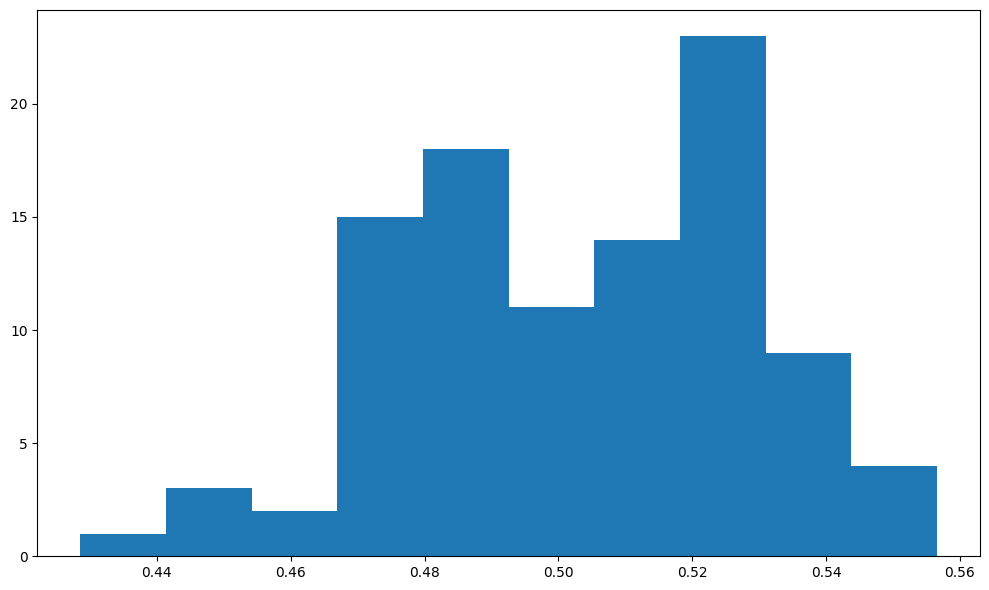

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## تعلق اور ایول بیس بال کارپوریشن

تعلق ہمیں ڈیٹا کے سلسلوں کے درمیان روابط تلاش کرنے کی اجازت دیتا ہے۔ ہمارے اس مثال میں، فرض کریں کہ ایک ایول بیس بال کارپوریشن ہے جو اپنے کھلاڑیوں کو ان کے قد کے مطابق ادائیگی کرتی ہے - جتنا کھلاڑی لمبا ہوگا، اتنی ہی زیادہ رقم وہ حاصل کرے گا۔ فرض کریں کہ ایک بنیادی تنخواہ $1000 ہے، اور قد کے مطابق $0 سے $100 تک کا اضافی بونس دیا جاتا ہے۔ ہم MLB کے حقیقی کھلاڑیوں کو لیں گے اور ان کی خیالی تنخواہیں حساب کریں گے:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


آئیے اب ان سلسلوں کی کوویریئنس اور تعلق کا حساب لگائیں۔ `np.cov` ہمیں ایک **کوویریئنس میٹرکس** دے گا، جو کوویریئنس کو متعدد متغیروں تک بڑھانے کا ایک طریقہ ہے۔ کوویریئنس میٹرکس $M$ کا عنصر $M_{ij}$ ان پٹ متغیروں $X_i$ اور $X_j$ کے درمیان تعلق کو ظاہر کرتا ہے، اور قطر کے عناصر $M_{ii}$ متغیر $X_{i}$ کی ویرینس کو ظاہر کرتے ہیں۔ اسی طرح، `np.corrcoef` ہمیں **تعلق میٹرکس** فراہم کرے گا۔


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


دو متغیروں کے درمیان ایک مضبوط **لکیری تعلق** کا مطلب ہے کہ ارتباط 1 کے برابر ہے۔ ہم ایک قدر کو دوسری کے مقابلے میں پلاٹ کرکے لکیری تعلق کو بصری طور پر دیکھ سکتے ہیں:


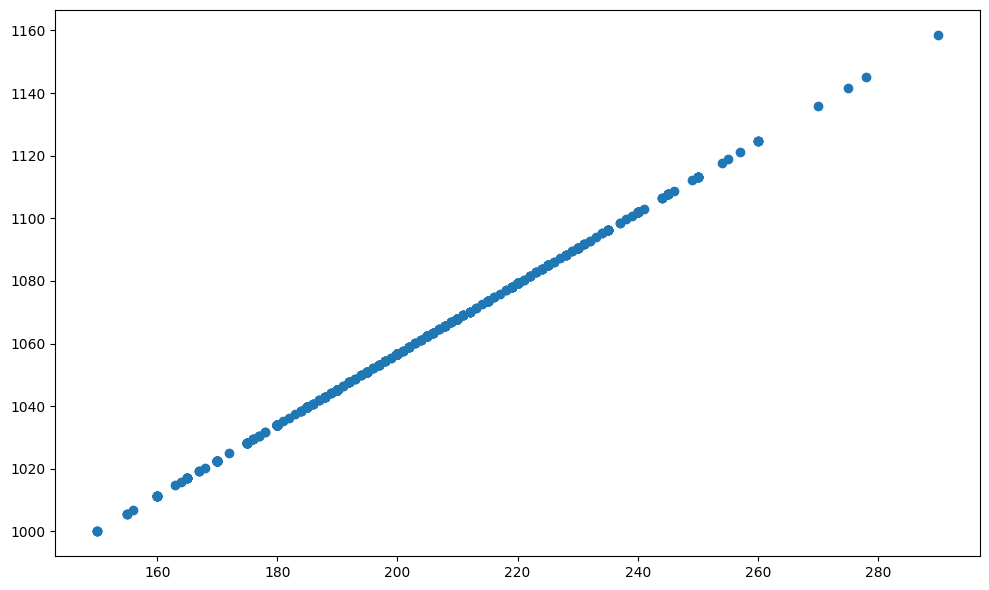

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

آئیے دیکھتے ہیں کہ کیا ہوتا ہے اگر تعلق خطی نہ ہو۔ فرض کریں کہ ہماری کارپوریشن نے اونچائیوں اور تنخواہوں کے درمیان واضح خطی انحصار کو چھپانے کا فیصلہ کیا، اور فارمولا میں کچھ غیر خطی عنصر جیسے `sin` شامل کر دیا:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


اس صورت میں، تعلق تھوڑا کم ہے، لیکن یہ اب بھی کافی زیادہ ہے۔ اب، تعلق کو اور بھی کم واضح بنانے کے لیے، ہم تنخواہ میں کچھ بے ترتیب متغیر شامل کرکے کچھ اضافی بے ترتیبی شامل کرنا چاہ سکتے ہیں۔ آئیے دیکھتے ہیں کیا ہوتا ہے:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


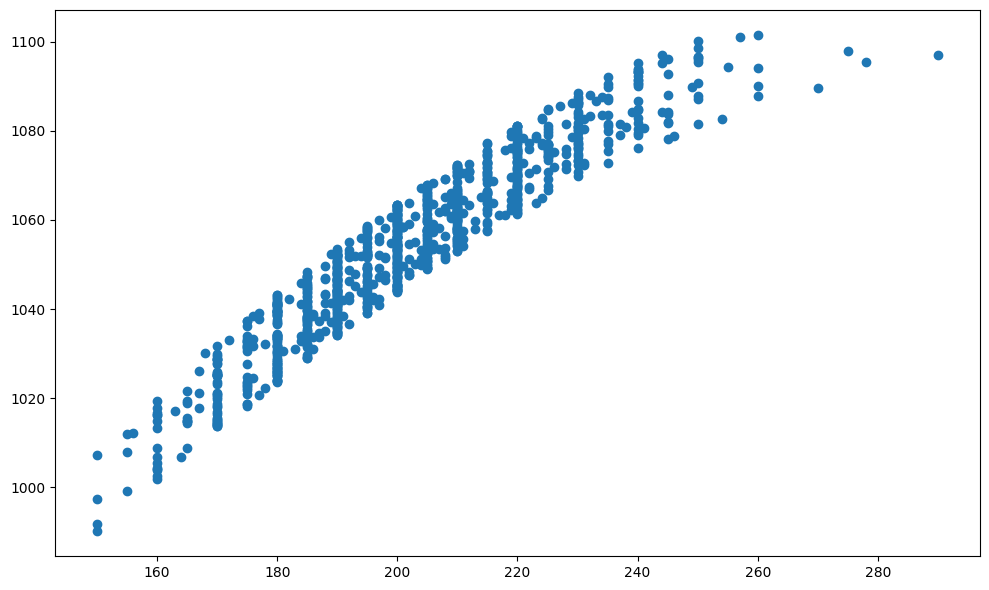

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

کیا آپ اندازہ لگا سکتے ہیں کہ نقطے اس طرح عمودی لائنوں میں کیوں ترتیب پاتے ہیں؟

ہم نے ایک مصنوعی طور پر تیار کردہ تصور جیسے تنخواہ اور مشاہدہ شدہ متغیر *قد* کے درمیان تعلق کا مشاہدہ کیا ہے۔ آئیے دیکھتے ہیں کہ کیا دو مشاہدہ شدہ متغیرات، جیسے قد اور وزن، بھی آپس میں تعلق رکھتے ہیں:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

بدقسمتی سے، ہمیں کوئی نتائج نہیں ملے - صرف کچھ عجیب `nan` قدریں۔ اس کی وجہ یہ ہے کہ ہماری سیریز میں کچھ قدریں غیر متعین ہیں، جو `nan` کے طور پر ظاہر ہوتی ہیں، اور اس کی وجہ سے آپریشن کا نتیجہ بھی غیر متعین ہو جاتا ہے۔ میٹرکس کو دیکھ کر ہم دیکھ سکتے ہیں کہ `Weight` مسئلہ پیدا کرنے والا کالم ہے، کیونکہ `Height` کی خود سے تعلق کا حساب لگایا گیا ہے۔

> یہ مثال **ڈیٹا کی تیاری** اور **صفائی** کی اہمیت کو ظاہر کرتی ہے۔ مناسب ڈیٹا کے بغیر ہم کچھ بھی حساب نہیں لگا سکتے۔

آئیے `fillna` طریقہ استعمال کرتے ہیں تاکہ گمشدہ قدریں بھری جا سکیں، اور تعلق کا حساب لگائیں:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

درحقیقت ایک تعلق موجود ہے، لیکن یہ ہمارے مصنوعی مثال کی طرح اتنا مضبوط نہیں ہے۔ واقعی، اگر ہم ایک قدر کے مقابلے میں دوسری قدر کے اسکیٹر پلاٹ کو دیکھیں، تو تعلق بہت کم واضح ہوگا:


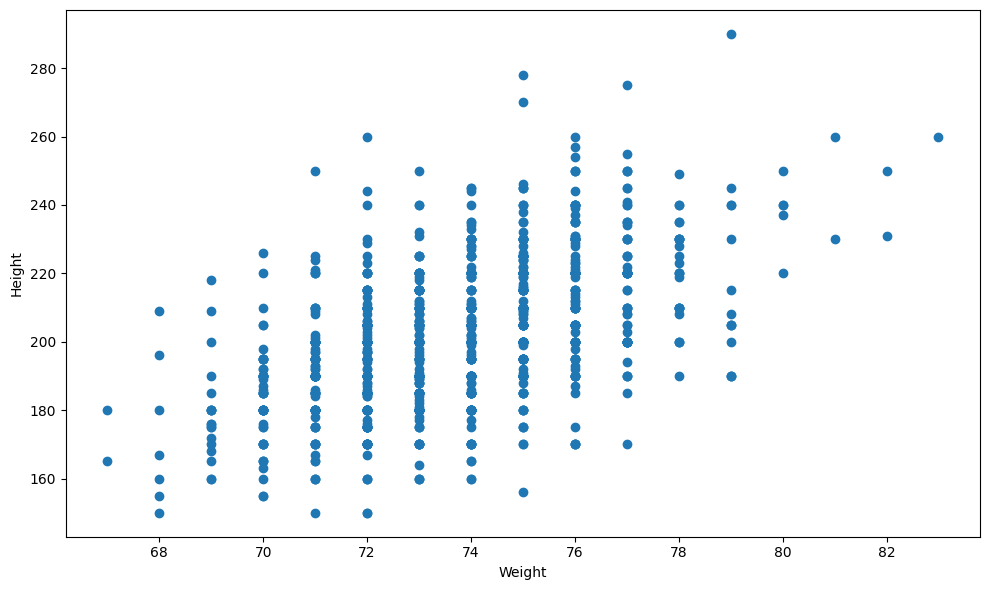

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## نتیجہ

اس نوٹ بک میں ہم نے سیکھا کہ ڈیٹا پر بنیادی عملیات کیسے انجام دی جاتی ہیں تاکہ شماریاتی فنکشنز کا حساب لگایا جا سکے۔ اب ہم جانتے ہیں کہ ریاضی اور شماریات کے مضبوط آلات کو استعمال کرتے ہوئے کچھ مفروضے کیسے ثابت کیے جا سکتے ہیں، اور دیے گئے ڈیٹا نمونے کے لیے کسی بھی متغیر کے اعتماد کے وقفے کیسے حساب کیے جا سکتے ہیں۔



---

**ڈسکلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے پوری کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا عدم درستگی ہو سکتی ہیں۔ اصل دستاویز کو اس کی اصل زبان میں مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے لیے ہم ذمہ دار نہیں ہیں۔
